In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sales.csv')

In [3]:
df.dropna(subset=['price'], inplace=True)

In [4]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [5]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

In [11]:
train_raw.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
5,$59k,"$60,320",2 Ton 930 Kg,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm,2011


# 1. Pearson Correlation

<font color='red'>Assignment:</font> Get a Dataframe **train** which contains all the numerical values of **price**, **cost**, **weight**, **height**, **width**, and **depth** in **train_raw**.

In [14]:
def weight2num(x):
    """
    This function transform weight string to numerical value.
    """
    if type(x) == str: 
        y = x.split(" Ton ")    
        return float(y[0]) * 1000 + float(y[1].replace(' Kg',''))
    else:
        return x

In [18]:
train = pd.DataFrame()
train['price'] = train_raw['price'].map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))
train['cost'] = train_raw['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
train['weight'] = train_raw['weight'].map(weight2num)
train['height'] = train_raw['height'].map(lambda x: x if type(x) == float else float(x.replace('meters', '')))
train['width'] = train_raw['width'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
train['depth'] = train_raw['depth'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
train.head()

,price,cost,weight,height,width,depth
0,300492.0,333000.0,3090.0,2.76,97.0,26.0
1,430570.0,NaN,3030.0,2.67,98.0,26.0
2,213070.0,270000.0,3040.0,3.00,93.0,24.0
4,122659.0,97000.0,2970.0,2.47,101.0,26.0
5,60320.0,59000.0,2930.0,2.71,96.0,25.0


<font color='red'>Assignment:</font> Calculate Pearson correlations between all the columns in **train**. Using **DataFrame.corr()**.

In [19]:
train.corr()

,price,cost,weight,height,width,depth
price,1.000000,0.618253,0.301362,0.088917,0.074010,0.076007
cost,0.618253,1.000000,0.347582,0.092488,0.101852,0.103242
weight,0.301362,0.347582,1.000000,0.175936,0.358753,0.349840
height,0.088917,0.092488,0.175936,1.000000,-0.848096,-0.833685
width,0.074010,0.101852,0.358753,-0.848096,1.000000,0.979237
depth,0.076007,0.103242,0.349840,-0.833685,0.979237,1.000000


<font color='red'>Question:</font> How Pearson correlation is calcualted? What does it mean?

In [ ]:
# The Pearson correlation of two variables is calculated as the covariance of the two variables devided by the product of 
# their standard deviation.
# The Pearson correlation measure the strength of linear association of two variables by an r value ranged from -1 to 1, 
# while r = 1 means positive linear association, r = -1 means negative linear association, r = 0 means no association.

<font color='red'>Assignment:</font> Plot the correlations in heatmap using **seaborn**.

<AxesSubplot:>

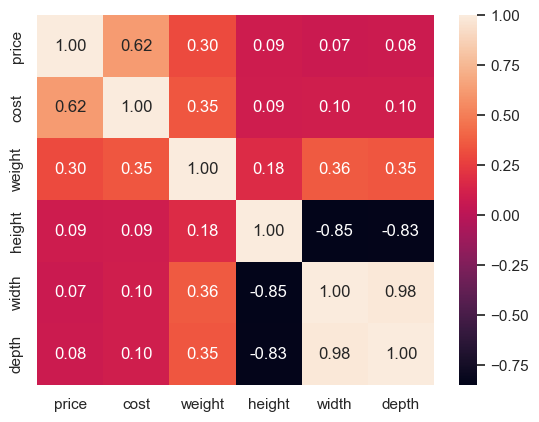

In [22]:
#import matplotlib.pylab as plt
#%matplotlib inline

import seaborn as sns
sns.set_theme()

sns.heatmap(train.corr(), annot=True, fmt=".2f")

<font color='red'>Assignment:</font> Visulize the relationships between these columns using **pairplot** in **seaborn**.

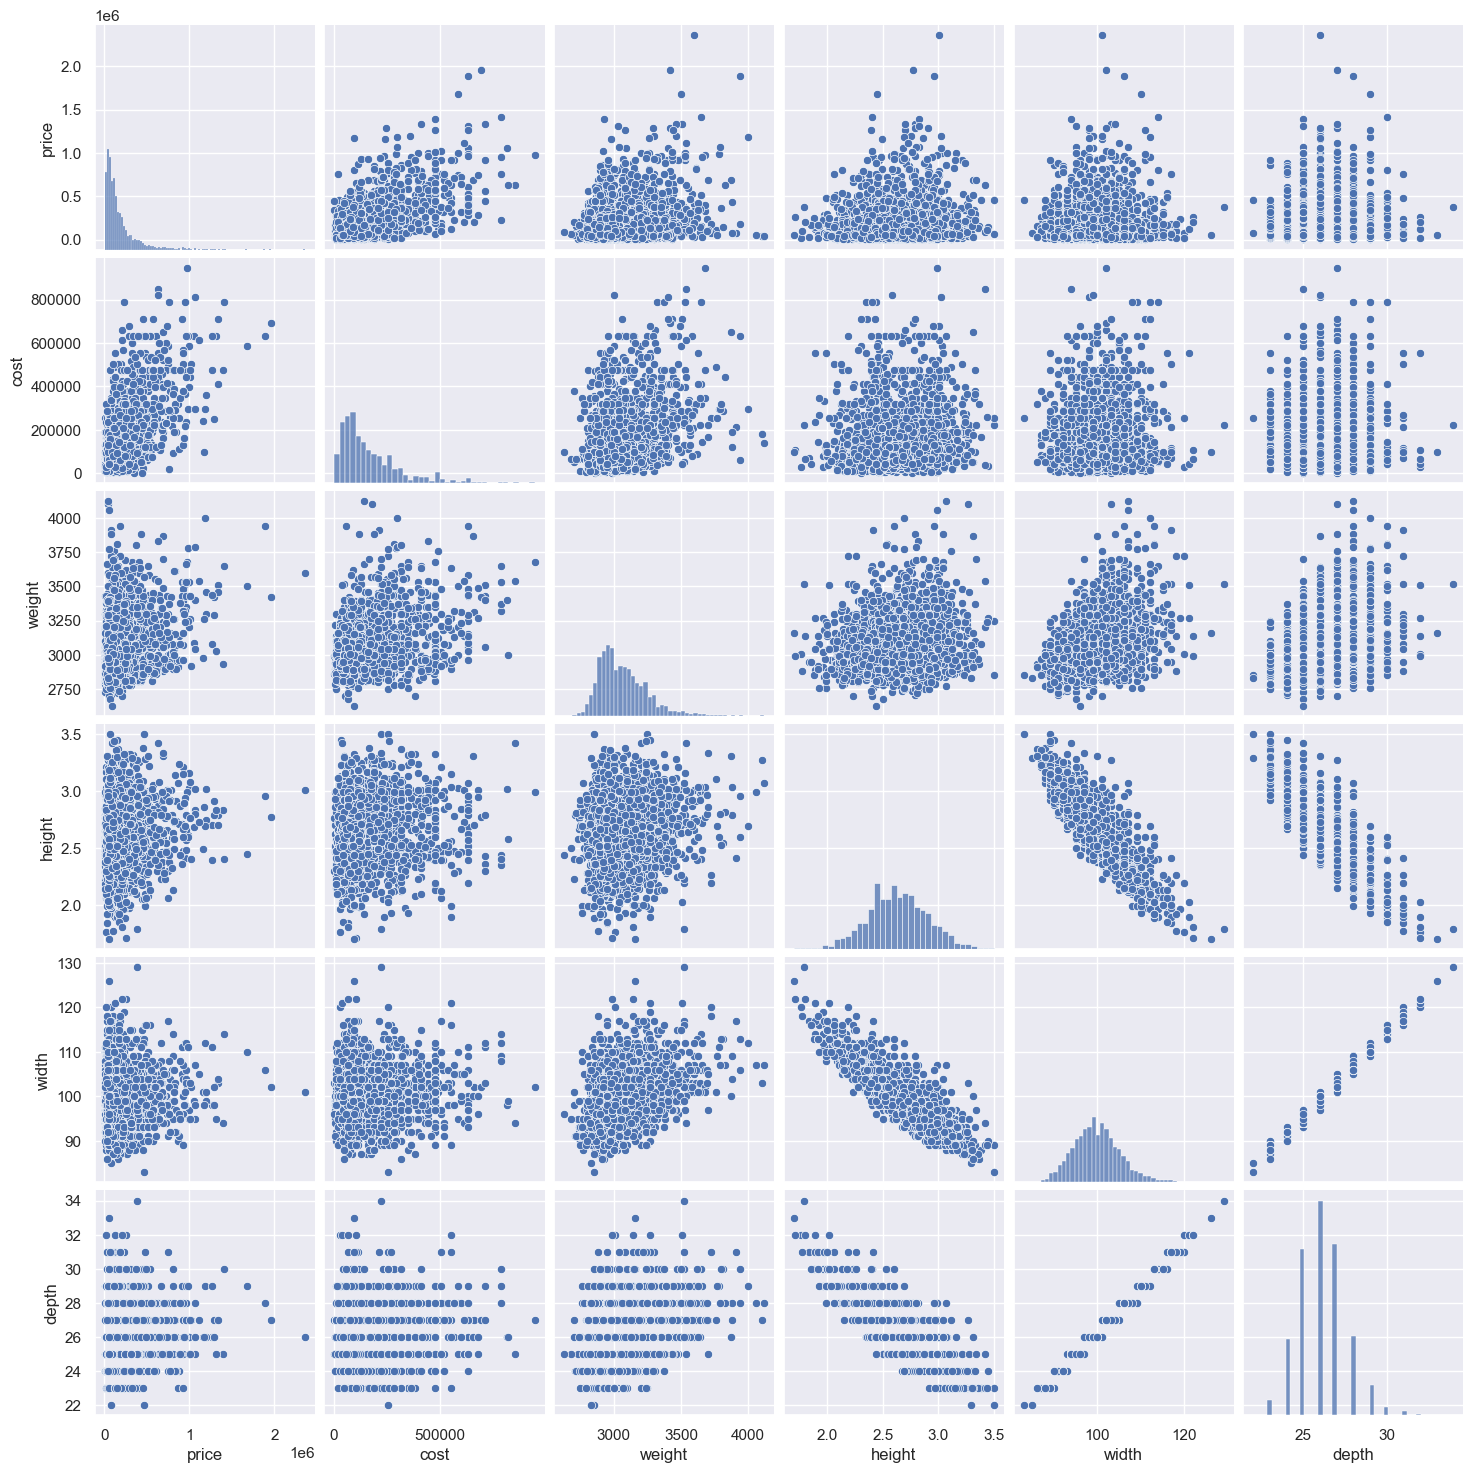

In [23]:
sns.pairplot(train)

<font color='red'>Question:</font> Which features are highly correlated?

In [ ]:
# There were high positive correlation between width and depth, and between price and cost. There were high negative correlation
# between height and width, and between height and depth.

# 2. Collinearity

<font color='red'>Assignment:</font> Build a transformer class to get numerical features and replace the missing values with the averages in train_raw.

In [28]:
class Numerical_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean = {}
        df = pd.DataFrame()        
        df['cost'] = X.cost
        self.mean['cost'] = df['cost'].mean()
        df['weight'] = X.weight
        self.mean['weight'] = df['weight'].mean()
        df['height'] = X.height
        self.mean['height'] = df['height'].mean()
        df['width'] = X.width
        self.mean['width'] = df['width'].mean()
        df['depth'] = X.depth
        self.mean['depth'] = df['depth'].mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        df['weight'] = X.weight
        df['height'] = X.height
        df['width'] = X.width
        df['depth'] = X.depth
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


<font color='red'>Assignment:</font> Wrap up the numerical transformer, MinMaxScaler, and linear regression as a pipeline to predict **price**. 

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
steps = [('ntf', Numerical_Transformer()),
         ('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model = Pipeline(steps)
model = model.fit(train, train.price)

<font color='red'>Assignment:</font> Obtain the training and testing scores. 

In [33]:
y_train_pred = model.predict(train)
y_train = train.price
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.14e+05
train MSE: 2.87e+10
train R2: 0.327


In [34]:
test = pd.DataFrame()
test['price'] = test_raw['price'].map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))
test['cost'] = test_raw['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
test['weight'] = test_raw['weight'].map(weight2num)
test['height'] = test_raw['height'].map(lambda x: x if type(x) == float else float(x.replace('meters', '')))
test['width'] = test_raw['width'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
test['depth'] = test_raw['depth'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
test.head()

,price,cost,weight,height,width,depth
3,229174.0,NaN,3050.0,2.50,102.0,27.0
10,168762.0,160000.0,3440.0,2.91,100.0,26.0
22,605022.0,160000.0,3120.0,2.93,95.0,25.0
23,4444.0,NaN,2980.0,2.14,109.0,28.0
50,17932.0,18000.0,3210.0,2.58,103.0,27.0


In [35]:
y_test_pred = model.predict(test)
y_test = test.price
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.43e+05
train MSE: 5.58e+10
train R2: 0.353


<font color='red'>Assignment:</font> Plot the feature importance. Hint: coefficients in linear regression. 

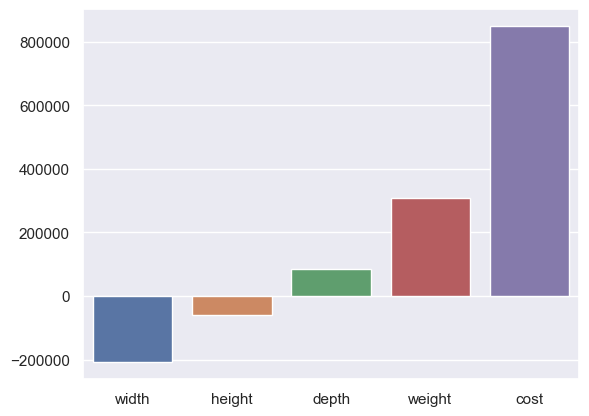

In [62]:
sns.set_style("darkgrid")
feature_importance = pd.Series(data=model[2].coef_, index=["cost", "weight", "height", "width", "depth"])
feature_importance = feature_importance.sort_values(ascending=True)
feature_importance
sns.barplot(x=feature_importance.index, y=feature_importance.values)
plt.show()


<font color='red'>Question:</font> How do you explain these feature importance?

In [63]:
# Feature importance is score descrbing the importance of a input feature to predict the output
# So cost and weight are the first and second input feature that predict the price.

<font color='red'>Assignment:</font> Remove **volumn**, **width**, and **height**, repeat the above steps.

In [69]:
class Numerical_Transformer1(object):
    
    def fit(self, X, y=None):
        self.mean = {}
        df = pd.DataFrame()        
        df['cost'] = X.cost
        self.mean['cost'] = df['cost'].mean()
        #df['weight'] = X.weight
        #self.mean['weight'] = df['weight'].mean()
        #df['height'] = X.height
        #self.mean['height'] = df['height'].mean()
        #df['width'] = X.width
        #self.mean['width'] = df['width'].mean()
        df['depth'] = X.depth
        self.mean['depth'] = df['depth'].mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost
        #df['weight'] = X.weight
        #df['height'] = X.height
        #df['width'] = X.width
        df['depth'] = X.depth
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [70]:
steps = [('ntf', Numerical_Transformer1()),
         ('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model = Pipeline(steps)
model = model.fit(train, train.price)

In [71]:
y_train_pred = model.predict(train)
y_train = train.price
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.15e+05
train MSE: 2.95e+10
train R2: 0.307


In [72]:
y_test_pred = model.predict(test)
y_test = test.price
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.44e+05
train MSE: 5.62e+10
train R2: 0.348


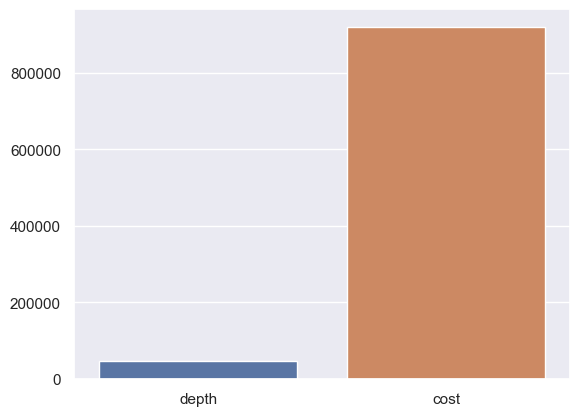

In [73]:
sns.set_style("darkgrid")
feature_importance = pd.Series(data=model[2].coef_, index=["cost", "depth"])
feature_importance = feature_importance.sort_values(ascending=True)
feature_importance
sns.barplot(x=feature_importance.index, y=feature_importance.values)
plt.show()

<font color='red'>Question:</font> What are the differences in training/testing scores and feature importance?

In [ ]:
# training/testing scores (MSE) slightly increase and feature importance does not change

<font color='red'>Question:</font> What is collinearity? How can we solve it?

In [ ]:
# Collinearity happens while one independent variable is highly correlated to one or more other independent variable.
# This means the regression coefficients are not unique determined and it hurts the interpretability of the model.
# Ways to solve the collinearity:
# 1 Remove highly correlated independent variable
# 2 Linearly combined those highly correlated independent variables into a new variable
# 3 Use principal component analysis or other analyses for highly correlated independent variables